In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [75]:
df_cov=pd.read_excel('E:/covid19_clinical_dataset.xlsx')
df_cov=pd.DataFrame(df_cov)
df_cov

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


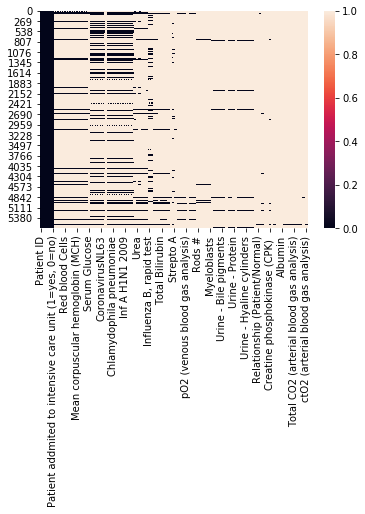

In [76]:
#checking for any missing data
sns.heatmap(df_cov.isnull())

In [77]:
df_cov.isnull().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

In [78]:
for i in df_cov.columns:
    print(df_cov[i].value_counts)

<bound method IndexOpsMixin.value_counts of 0       44477f75e8169d2
1       126e9dd13932f68
2       a46b4402a0e5696
3       f7d619a94f97c45
4       d9e41465789c2b5
             ...       
5639    ae66feb9e4dc3a0
5640    517c2834024f3ea
5641    5c57d6037fe266d
5642    c20c44766f28291
5643    2697fdccbfeb7f7
Name: Patient ID, Length: 5644, dtype: object>
<bound method IndexOpsMixin.value_counts of 0       13
1       17
2        8
3        5
4       15
        ..
5639     3
5640    17
5641     4
5642    10
5643    19
Name: Patient age quantile, Length: 5644, dtype: int64>
<bound method IndexOpsMixin.value_counts of 0       negative
1       negative
2       negative
3       negative
4       negative
          ...   
5639    positive
5640    negative
5641    negative
5642    negative
5643    positive
Name: SARS-Cov-2 exam result, Length: 5644, dtype: object>
<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       0
       ..
5639    0
5640    0
5641    0


Name: Relationship (Patient/Normal), Length: 5644, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
5639   NaN
5640   NaN
5641   NaN
5642   NaN
5643   NaN
Name: International normalized ratio (INR), Length: 5644, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5639         NaN
5640         NaN
5641         NaN
5642         NaN
5643    0.420204
Name: Lactic Dehydrogenase, Length: 5644, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
5639   NaN
5640   NaN
5641   NaN
5642   NaN
5643   NaN
Name: Prothrombin time (PT), Activity, Length: 5644, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
5639   NaN
5640   NaN
5641   NaN
5642   NaN
5643   NaN
Name: 

In [79]:
df_cov.drop(['Patient ID'],axis=1,inplace = True)

In [80]:
df_cov.dropna(axis=1,inplace=True)

In [81]:
df_cov.isnull().sum()

Patient age quantile                                     0
SARS-Cov-2 exam result                                   0
Patient addmited to regular ward (1=yes, 0=no)           0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0
Patient addmited to intensive care unit (1=yes, 0=no)    0
dtype: int64

In [82]:
df_cov

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
0,13,negative,0,0,0
1,17,negative,0,0,0
2,8,negative,0,0,0
3,5,negative,0,0,0
4,15,negative,0,0,0
...,...,...,...,...,...
5639,3,positive,0,0,0
5640,17,negative,0,0,0
5641,4,negative,0,0,0
5642,10,negative,0,0,0


In [83]:
#checking data types
df_cov.dtypes
#We can see the attributes are in numerical form

Patient age quantile                                      int64
SARS-Cov-2 exam result                                   object
Patient addmited to regular ward (1=yes, 0=no)            int64
Patient addmited to semi-intensive unit (1=yes, 0=no)     int64
Patient addmited to intensive care unit (1=yes, 0=no)     int64
dtype: object

In [84]:
#checking the basic info about the attributes and their counts
df_cov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 5 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Patient age quantile                                   5644 non-null   int64 
 1   SARS-Cov-2 exam result                                 5644 non-null   object
 2   Patient addmited to regular ward (1=yes, 0=no)         5644 non-null   int64 
 3   Patient addmited to semi-intensive unit (1=yes, 0=no)  5644 non-null   int64 
 4   Patient addmited to intensive care unit (1=yes, 0=no)  5644 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 220.6+ KB


In [85]:
#checking the maximum and minimum values of each attribute and their percentiles
df_cov.describe()

,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
count,5644.000000,5644.000000,5644.000000,5644.000000
mean,9.318391,0.013997,0.008859,0.007264
std,5.777903,0.117489,0.093713,0.084929
min,0.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,0.000000,0.000000
75%,14.000000,0.000000,0.000000,0.000000
max,19.000000,1.000000,1.000000,1.000000


In [90]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_cov['SARS-Cov-2 exam result']=le.fit_transform(df_cov['SARS-Cov-2 exam result'])

# Univariate Analysis

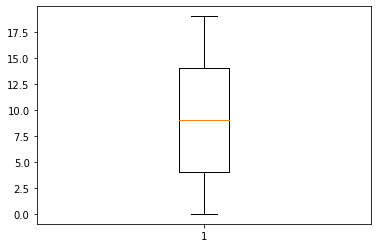

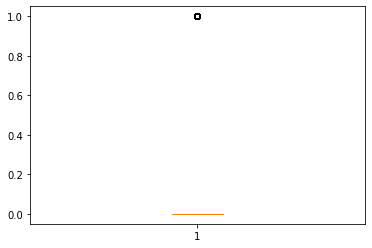

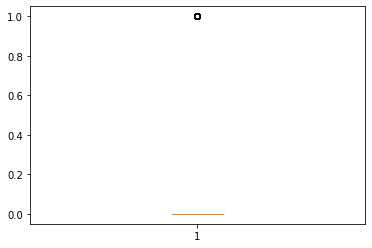

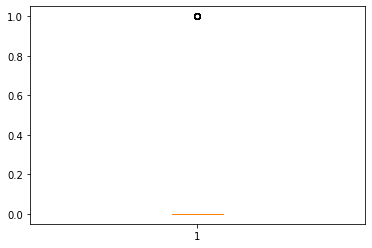

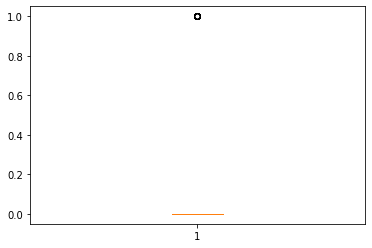

In [91]:
for i in df_cov.columns:
    plt.boxplot(df_cov[i])
    plt.show()

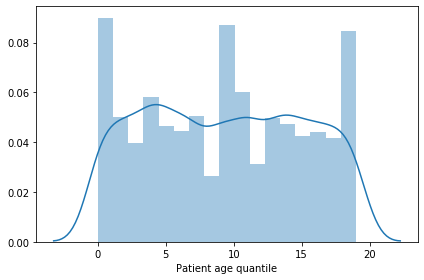

In [93]:
#Checking for the distribution of the data
sns.distplot(df_cov['Patient age quantile'],bins='auto')
plt.tight_layout()
plt.show()

# Bivariate Analysis

In [97]:
#Checking the correlation between the attributes
df_cov.corr()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)"
Patient age quantile,1.000000,0.075244,0.046166,0.015736,-0.035772
SARS-Cov-2 exam result,0.075244,1.000000,0.142437,0.019364,0.027586
"Patient addmited to regular ward (1=yes, 0=no)",0.046166,0.142437,1.000000,-0.011264,-0.010192
"Patient addmited to semi-intensive unit (1=yes, 0=no)",0.015736,0.019364,-0.011264,1.000000,-0.008087
"Patient addmited to intensive care unit (1=yes, 0=no)",-0.035772,0.027586,-0.010192,-0.008087,1.000000


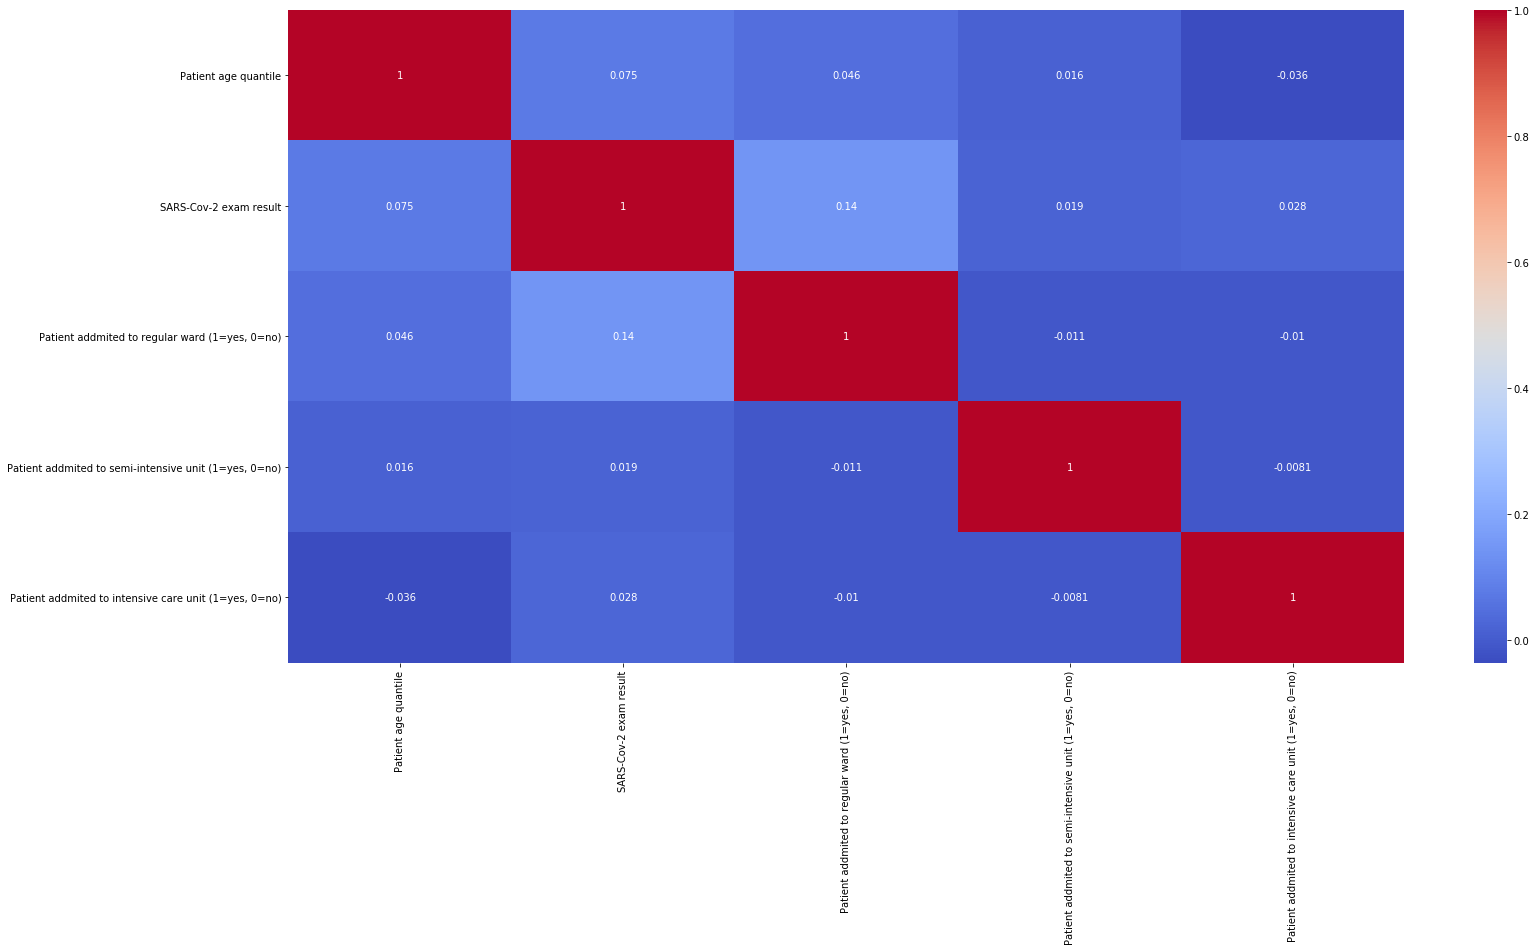

In [98]:
plt.figure(figsize=(25,12))
sns.heatmap(df_cov.corr(),cmap='coolwarm',annot=True)
plt.show()

# Mutivariate Analysis

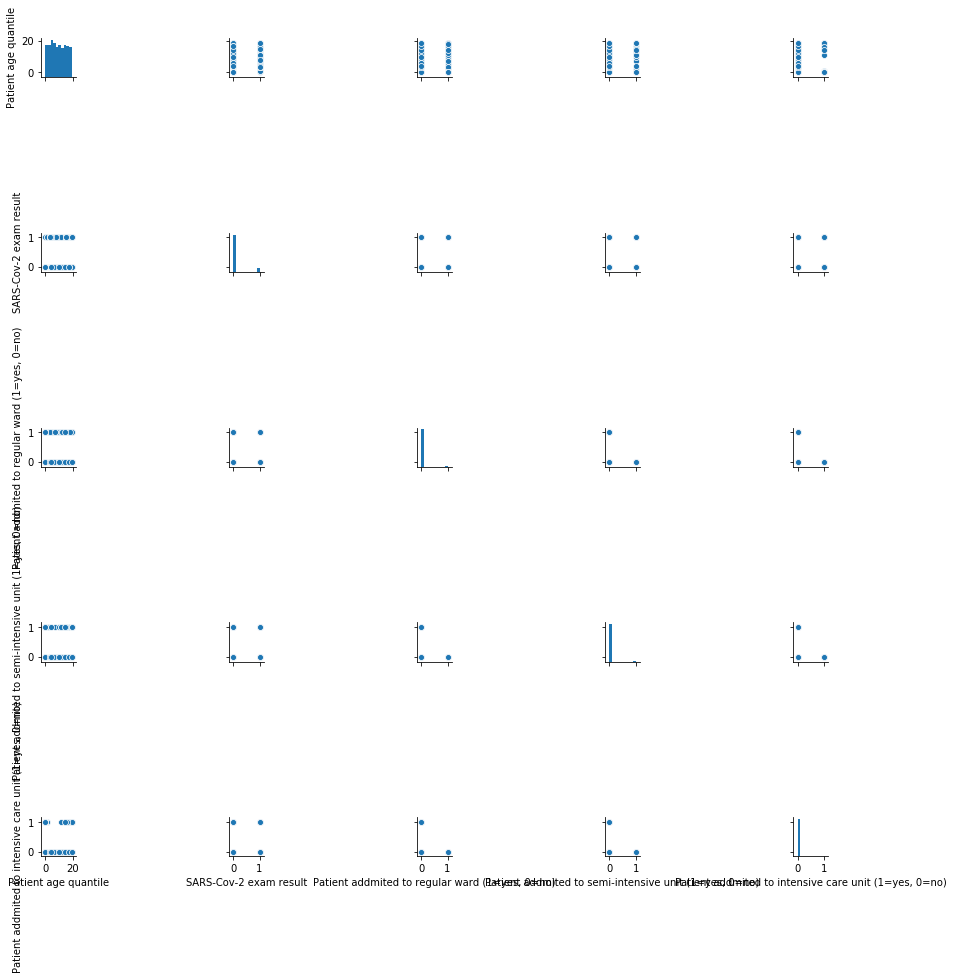

In [99]:
sns.pairplot(df_cov)

In [58]:
#separating into input and output variables
x=df_cov.drop(columns=['SARS-Cov-2 exam result'])
y=pd.DataFrame(df_cov['SARS-Cov-2 exam result'])

In [59]:
x.shape

(5644, 4)

In [60]:
y.shape

(5644, 1)

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB                                                                                                                   
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [62]:
max_acc_scr=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    model=[LogisticRegression(),SVC(),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier()]
    for m in model:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        predm=m.predict(x_test)
        accscr=accuracy_score(y_test,predm)
        conmatrix=confusion_matrix(y_test,predm)
        classreport=classification_report(y_test,predm)
        print("accuracy score of",m,'is:')
        print('accuracy score corresponding to random state:',r_state,'is:',accscr)
        print('confusion matrix corresponding to random state:',r_state,'is:',conmatrix)
        print('classification report corresponding to random state:',r_state,'is:',classreport)
        if accscr>max_acc_scr:
            max_acc_scr=accscr
            final_r_state=r_state
            final_model=m
        print()

accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
accuracy score corresponding to random state: 42 is: 0.9043401240035429
confusion matrix corresponding to random state: 42 is: [[1018    3]
 [ 105    3]]
classification report corresponding to random state: 42 is:               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1021
           1       0.50      0.03      0.05       108

    accuracy                           0.90      1129
   macro avg       0.70      0.51      0.50      1129
weighted avg       0.87      0.90      0.86      1129


accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_func

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 44 is: 0.9069973427812223
confusion matrix corresponding to random state: 44 is: [[1024    0]
 [ 105    0]]
classification report corresponding to random state: 44 is:               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1024
           1       0.00      0.00      0.00       105

    accuracy                           0.91      1129
   macro avg       0.45      0.50      0.48      1129
weighted avg       0.82      0.91      0.86      1129


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
              

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 46 is: 0.9034543844109831
confusion matrix corresponding to random state: 46 is: [[1020    0]
 [ 109    0]]
classification report corresponding to random state: 46 is:               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1020
           1       0.00      0.00      0.00       109

    accuracy                           0.90      1129
   macro avg       0.45      0.50      0.47      1129
weighted avg       0.82      0.90      0.86      1129


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
              

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 48 is: 0.8919397697077059
confusion matrix corresponding to random state: 48 is: [[1007    0]
 [ 122    0]]
classification report corresponding to random state: 48 is:               precision    recall  f1-score   support

           0       0.89      1.00      0.94      1007
           1       0.00      0.00      0.00       122

    accuracy                           0.89      1129
   macro avg       0.45      0.50      0.47      1129
weighted avg       0.80      0.89      0.84      1129


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
              

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 50 is: 0.8919397697077059
confusion matrix corresponding to random state: 50 is: [[1007    0]
 [ 122    0]]
classification report corresponding to random state: 50 is:               precision    recall  f1-score   support

           0       0.89      1.00      0.94      1007
           1       0.00      0.00      0.00       122

    accuracy                           0.89      1129
   macro avg       0.45      0.50      0.47      1129
weighted avg       0.80      0.89      0.84      1129


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
              

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 52 is: 0.895482728077945
confusion matrix corresponding to random state: 52 is: [[1011    0]
 [ 118    0]]
classification report corresponding to random state: 52 is:               precision    recall  f1-score   support

           0       0.90      1.00      0.94      1011
           1       0.00      0.00      0.00       118

    accuracy                           0.90      1129
   macro avg       0.45      0.50      0.47      1129
weighted avg       0.80      0.90      0.85      1129


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
               

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 54 is: 0.9087688219663419
confusion matrix corresponding to random state: 54 is: [[1026    0]
 [ 103    0]]
classification report corresponding to random state: 54 is:               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1026
           1       0.00      0.00      0.00       103

    accuracy                           0.91      1129
   macro avg       0.45      0.50      0.48      1129
weighted avg       0.83      0.91      0.87      1129


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
              

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 56 is: 0.8919397697077059
confusion matrix corresponding to random state: 56 is: [[1007    0]
 [ 122    0]]
classification report corresponding to random state: 56 is:               precision    recall  f1-score   support

           0       0.89      1.00      0.94      1007
           1       0.00      0.00      0.00       122

    accuracy                           0.89      1129
   macro avg       0.45      0.50      0.47      1129
weighted avg       0.80      0.89      0.84      1129


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
              

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 58 is: 0.9176262178919398
confusion matrix corresponding to random state: 58 is: [[1036    0]
 [  93    0]]
classification report corresponding to random state: 58 is:               precision    recall  f1-score   support

           0       0.92      1.00      0.96      1036
           1       0.00      0.00      0.00        93

    accuracy                           0.92      1129
   macro avg       0.46      0.50      0.48      1129
weighted avg       0.84      0.92      0.88      1129


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
              

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 60 is: 0.9052258635961028
confusion matrix corresponding to random state: 60 is: [[1022    0]
 [ 107    0]]
classification report corresponding to random state: 60 is:               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1022
           1       0.00      0.00      0.00       107

    accuracy                           0.91      1129
   macro avg       0.45      0.50      0.48      1129
weighted avg       0.82      0.91      0.86      1129


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
              

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 62 is: 0.895482728077945
confusion matrix corresponding to random state: 62 is: [[1011    0]
 [ 118    0]]
classification report corresponding to random state: 62 is:               precision    recall  f1-score   support

           0       0.90      1.00      0.94      1011
           1       0.00      0.00      0.00       118

    accuracy                           0.90      1129
   macro avg       0.45      0.50      0.47      1129
weighted avg       0.80      0.90      0.85      1129


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
               

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 64 is: 0.899911426040744
confusion matrix corresponding to random state: 64 is: [[1016    0]
 [ 113    0]]
classification report corresponding to random state: 64 is:               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1016
           1       0.00      0.00      0.00       113

    accuracy                           0.90      1129
   macro avg       0.45      0.50      0.47      1129
weighted avg       0.81      0.90      0.85      1129


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
               

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 66 is: 0.9096545615589017
confusion matrix corresponding to random state: 66 is: [[1027    0]
 [ 102    0]]
classification report corresponding to random state: 66 is:               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1027
           1       0.00      0.00      0.00       102

    accuracy                           0.91      1129
   macro avg       0.45      0.50      0.48      1129
weighted avg       0.83      0.91      0.87      1129


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
              

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 68 is: 0.9069973427812223
confusion matrix corresponding to random state: 68 is: [[1024    0]
 [ 105    0]]
classification report corresponding to random state: 68 is:               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1024
           1       0.00      0.00      0.00       105

    accuracy                           0.91      1129
   macro avg       0.45      0.50      0.48      1129
weighted avg       0.82      0.91      0.86      1129


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
              

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 70 is: 0.9247121346324181
confusion matrix corresponding to random state: 70 is: [[1044    0]
 [  85    0]]
classification report corresponding to random state: 70 is:               precision    recall  f1-score   support

           0       0.92      1.00      0.96      1044
           1       0.00      0.00      0.00        85

    accuracy                           0.92      1129
   macro avg       0.46      0.50      0.48      1129
weighted avg       0.86      0.92      0.89      1129


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
              

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 72 is: 0.9087688219663419
confusion matrix corresponding to random state: 72 is: [[1026    0]
 [ 103    0]]
classification report corresponding to random state: 72 is:               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1026
           1       0.00      0.00      0.00       103

    accuracy                           0.91      1129
   macro avg       0.45      0.50      0.48      1129
weighted avg       0.83      0.91      0.87      1129


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
              

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 74 is: 0.8848538529672276
confusion matrix corresponding to random state: 74 is: [[999   0]
 [130   0]]
classification report corresponding to random state: 74 is:               precision    recall  f1-score   support

           0       0.88      1.00      0.94       999
           1       0.00      0.00      0.00       130

    accuracy                           0.88      1129
   macro avg       0.44      0.50      0.47      1129
weighted avg       0.78      0.88      0.83      1129


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                  

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 76 is: 0.9007971656333038
confusion matrix corresponding to random state: 76 is: [[1017    0]
 [ 112    0]]
classification report corresponding to random state: 76 is:               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1017
           1       0.00      0.00      0.00       112

    accuracy                           0.90      1129
   macro avg       0.45      0.50      0.47      1129
weighted avg       0.81      0.90      0.85      1129


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
              

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 78 is: 0.8981399468556245
confusion matrix corresponding to random state: 78 is: [[1014    0]
 [ 115    0]]
classification report corresponding to random state: 78 is:               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1014
           1       0.00      0.00      0.00       115

    accuracy                           0.90      1129
   macro avg       0.45      0.50      0.47      1129
weighted avg       0.81      0.90      0.85      1129


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
              

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 80 is: 0.8990256864481843
confusion matrix corresponding to random state: 80 is: [[1015    0]
 [ 114    0]]
classification report corresponding to random state: 80 is:               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1015
           1       0.00      0.00      0.00       114

    accuracy                           0.90      1129
   macro avg       0.45      0.50      0.47      1129
weighted avg       0.81      0.90      0.85      1129


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
              

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 82 is: 0.8910540301151462
confusion matrix corresponding to random state: 82 is: [[1006    0]
 [ 123    0]]
classification report corresponding to random state: 82 is:               precision    recall  f1-score   support

           0       0.89      1.00      0.94      1006
           1       0.00      0.00      0.00       123

    accuracy                           0.89      1129
   macro avg       0.45      0.50      0.47      1129
weighted avg       0.79      0.89      0.84      1129


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
              

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 84 is: 0.9007971656333038
confusion matrix corresponding to random state: 84 is: [[1017    0]
 [ 112    0]]
classification report corresponding to random state: 84 is:               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1017
           1       0.00      0.00      0.00       112

    accuracy                           0.90      1129
   macro avg       0.45      0.50      0.47      1129
weighted avg       0.81      0.90      0.85      1129


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
              

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 86 is: 0.9096545615589017
confusion matrix corresponding to random state: 86 is: [[1027    0]
 [ 102    0]]
classification report corresponding to random state: 86 is:               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1027
           1       0.00      0.00      0.00       102

    accuracy                           0.91      1129
   macro avg       0.45      0.50      0.48      1129
weighted avg       0.83      0.91      0.87      1129


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
              

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 88 is: 0.8892825509300266
confusion matrix corresponding to random state: 88 is: [[1004    0]
 [ 125    0]]
classification report corresponding to random state: 88 is:               precision    recall  f1-score   support

           0       0.89      1.00      0.94      1004
           1       0.00      0.00      0.00       125

    accuracy                           0.89      1129
   macro avg       0.44      0.50      0.47      1129
weighted avg       0.79      0.89      0.84      1129


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
              

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 90 is: 0.8963684676705048
confusion matrix corresponding to random state: 90 is: [[1012    0]
 [ 117    0]]
classification report corresponding to random state: 90 is:               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1012
           1       0.00      0.00      0.00       117

    accuracy                           0.90      1129
   macro avg       0.45      0.50      0.47      1129
weighted avg       0.80      0.90      0.85      1129


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
              

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 92 is: 0.8866253321523472
confusion matrix corresponding to random state: 92 is: [[1001    0]
 [ 128    0]]
classification report corresponding to random state: 92 is:               precision    recall  f1-score   support

           0       0.89      1.00      0.94      1001
           1       0.00      0.00      0.00       128

    accuracy                           0.89      1129
   macro avg       0.44      0.50      0.47      1129
weighted avg       0.79      0.89      0.83      1129


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
              

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 94 is: 0.8981399468556245
confusion matrix corresponding to random state: 94 is: [[1014    0]
 [ 115    0]]
classification report corresponding to random state: 94 is:               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1014
           1       0.00      0.00      0.00       115

    accuracy                           0.90      1129
   macro avg       0.45      0.50      0.47      1129
weighted avg       0.81      0.90      0.85      1129


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
              

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 96 is: 0.9131975199291408
confusion matrix corresponding to random state: 96 is: [[1031    0]
 [  98    0]]
classification report corresponding to random state: 96 is:               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1031
           1       0.00      0.00      0.00        98

    accuracy                           0.91      1129
   macro avg       0.46      0.50      0.48      1129
weighted avg       0.83      0.91      0.87      1129


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
              

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 98 is: 0.9016829052258636
confusion matrix corresponding to random state: 98 is: [[1018    0]
 [ 111    0]]
classification report corresponding to random state: 98 is:               precision    recall  f1-score   support

           0       0.90      1.00      0.95      1018
           1       0.00      0.00      0.00       111

    accuracy                           0.90      1129
   macro avg       0.45      0.50      0.47      1129
weighted avg       0.81      0.90      0.86      1129


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
              

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
accuracy score corresponding to random state: 100 is: 0.895482728077945
confusion matrix corresponding to random state: 100 is: [[1011    0]
 [ 118    0]]
classification report corresponding to random state: 100 is:               precision    recall  f1-score   support

           0       0.90      1.00      0.94      1011
           1       0.00      0.00      0.00       118

    accuracy                           0.90      1129
   macro avg       0.45      0.50      0.47      1129
weighted avg       0.80      0.90      0.85      1129


accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
            

In [63]:
print("Max accuracy Score corresponding to random state",final_r_state,"is",max_acc_scr,'and model is',final_model)

Max accuracy Score corresponding to random state 70 is 0.9264836138175376 and model is LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [64]:
LR=LogisticRegression()
SV=SVC()
DT=DecisionTreeClassifier()
KNN=KNeighborsClassifier()
GNB=GaussianNB()
RFC=RandomForestClassifier()

In [65]:
models=[]
models.append(('LogisticRegression',LR))
models.append(('SVC',SV))
models.append(('DecisionTreeClassifier',DT))
models.append(('KNeighborsClassifier',KNN))
models.append(('GaussianNB',GNB))
models.append(('RandomForestClassifier',RFC))

*********** LogisticRegression ***********


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy_score= 0.895482728077945


roc_auc_score= 0.5


classification_report
               precision    recall  f1-score   support

           0       0.90      1.00      0.94      1011
           1       0.00      0.00      0.00       118

    accuracy                           0.90      1129
   macro avg       0.45      0.50      0.47      1129
weighted avg       0.80      0.90      0.85      1129



[[1011    0]
 [ 118    0]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********** SVC ***********


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', deg

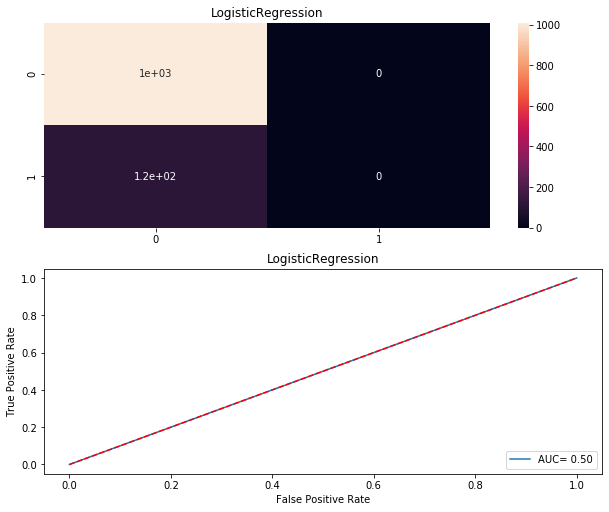

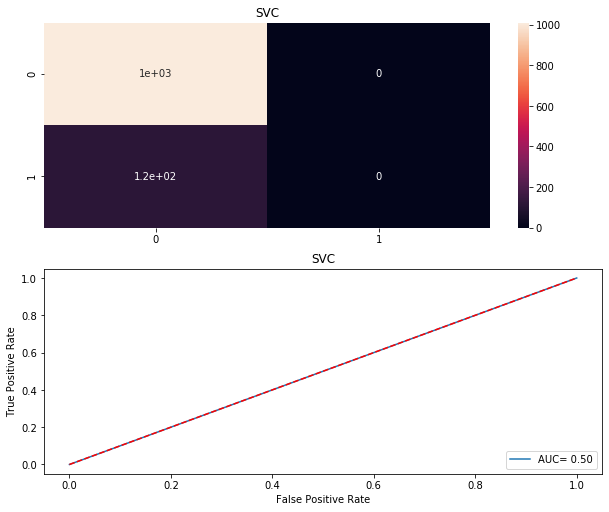

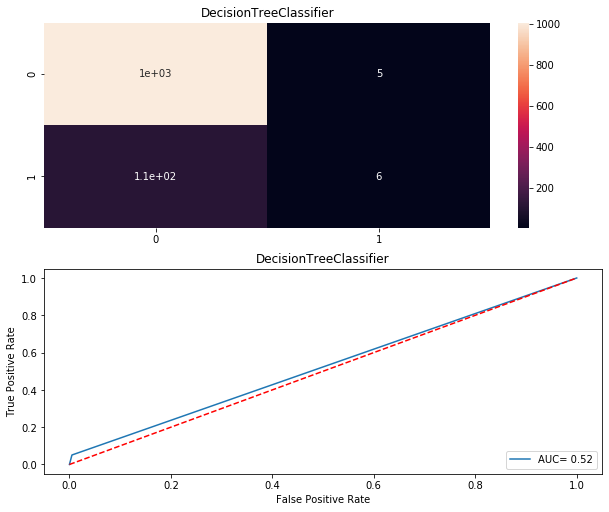

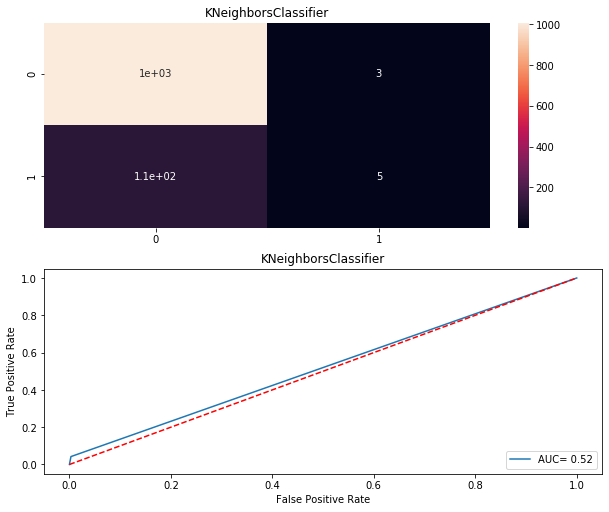

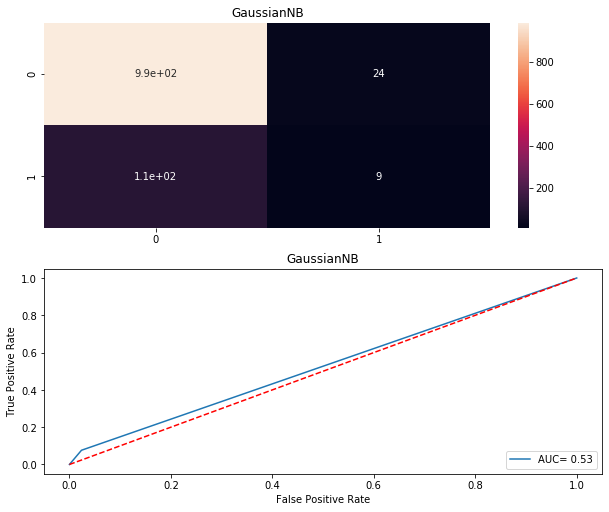

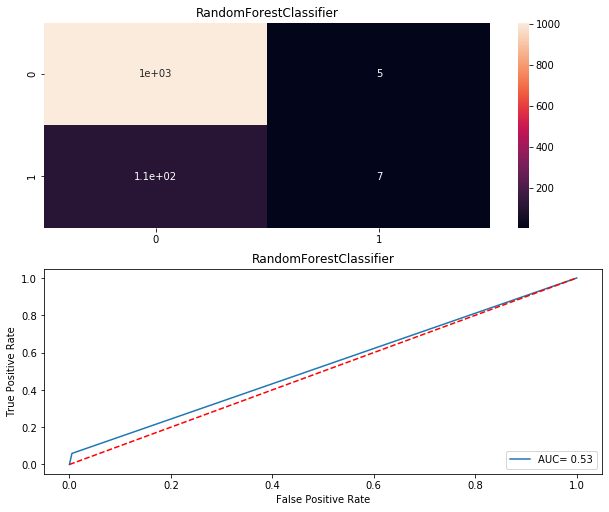

In [66]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('***********',name,'***********')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print("Accuracy_score=",AS)
    score.append(AS*100)
    print('\n')
    false_positive_rate,true_positive_rate, thresholds = roc_curve(y_test,pre,pos_label=1)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print("roc_auc_score=",roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC= %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')   

In [67]:
import sklearn
from sklearn.model_selection import cross_val_score
score=cross_val_score(sklearn.linear_model.LogisticRegression(),x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.90168291 0.90079717 0.90079717 0.90079717 0.89716312]
0.9002475045386301
0.0015798849054303836


In [68]:
#Trying to use Gradient Boosting Technique
#For getting best set of parameters, using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
parameters={'learning_rate':[0.0001,0.001,0.01,0.1,1],'n_estimators':[50,100,150,200,250,300,350,400,450,500]}
clf=GridSearchCV(gbc,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.0001, 'n_estimators': 50}

In [69]:
#Using cross val score to check the mean score and standard deviation
gbc=GradientBoostingClassifier(learning_rate=0.0001,n_estimators=50)
print("Mean score for Gradient Boosting Classifier:",cross_val_score(gbc,x,y,cv=5).mean())
print('Standard Deviation in score for Gradient Boosting Classifier:',cross_val_score(gbc,x,y,cv=5).std())

Mean score for Gradient Boosting Classifier: 0.9011340293613251
Standard Deviation in score for Gradient Boosting Classifier: 0.00041349178098893264


In [70]:
max_acc_scr=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    model=[GradientBoostingClassifier(learning_rate=0.1,n_estimators=200)]
    for m in model:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        predm=m.predict(x_test)
        accscr=accuracy_score(y_test,predm)
        conmatrix=confusion_matrix(y_test,predm)
        classreport=classification_report(y_test,predm)
        print("accuracy score of",m,'is:')
        print('accuracy score corresponding to random state:',r_state,'is:',accscr)
        print('confusion matrix corresponding to random state:',r_state,'is:',conmatrix)
        print('classification report corresponding to random state:',r_state,'is:',classreport)
        if accscr>max_acc_scr:
            max_acc_scr=accscr
            final_r_state=r_state
            final_model=m
        print()

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 42 is: 0.9016829052258636
confusion matrix corresponding to random state: 42 is: [[1014    7]
 [ 104    4]]
classification report corresponding to random state: 42 is:               precision    recall  f1-score   support

           0

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 49 is: 0.9114260407440212
confusion matrix corresponding to random state: 49 is: [[1022    5]
 [  95    7]]
classification report corresponding to random state: 49 is:               precision    recall  f1-score   support

           0

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 56 is: 0.8937112488928255
confusion matrix corresponding to random state: 56 is: [[1002    5]
 [ 115    7]]
classification report corresponding to random state: 56 is:               precision    recall  f1-score   support

           0

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 63 is: 0.9149689991142604
confusion matrix corresponding to random state: 63 is: [[1028    7]
 [  89    5]]
classification report corresponding to random state: 63 is:               precision    recall  f1-score   support

           0

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 70 is: 0.9229406554472985
confusion matrix corresponding to random state: 70 is: [[1038    6]
 [  81    4]]
classification report corresponding to random state: 70 is:               precision    recall  f1-score   support

           0

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 77 is: 0.9087688219663419
confusion matrix corresponding to random state: 77 is: [[1021    4]
 [  99    5]]
classification report corresponding to random state: 77 is:               precision    recall  f1-score   support

           0

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 84 is: 0.9034543844109831
confusion matrix corresponding to random state: 84 is: [[1013    4]
 [ 105    7]]
classification report corresponding to random state: 84 is:               precision    recall  f1-score   support

           0

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 91 is: 0.9211691762621789
confusion matrix corresponding to random state: 91 is: [[1036    6]
 [  83    4]]
classification report corresponding to random state: 91 is:               precision    recall  f1-score   support

           0

accuracy score of GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) is:
accuracy score corresponding to random state: 98 is: 0.899911426040744
confusion matrix corresponding to random state: 98 is: [[1008   10]
 [ 103    8]]
classification report corresponding to random state: 98 is:               precision    recall  f1-score   support

           0 

In [71]:
print("Max accuracy Score corresponding to random state",final_r_state,"is",max_acc_scr)

Max accuracy Score corresponding to random state 70 is 0.9229406554472985


In [72]:
#We tried all methods and till now LogisticRegression is the best option 
#Random state corresponding to highest r2 score is 70
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=70,test_size=0.20)
LR=LogisticRegression()
LR.fit(x_train,y_train)
predm=LR.predict(x_test)
accscr=accuracy_score(y_test,predm)
print("Mean score for LogisticRegression:",cross_val_score(LR,x,y,cv=5).mean())
print('Standard Deviation in score for LogisticRegression:',cross_val_score(LR,x,y,cv=5).std())
print("Accuracy score is:",accuracy_score(y_test,predm))

Mean score for LogisticRegression: 0.9002475045386301
Standard Deviation in score for LogisticRegression: 0.0015798849054303836
Accuracy score is: 0.9264836138175376


In [73]:
#Saving the modelas a pickle in a file
from sklearn.externals import joblib
joblib.dump(LR,"Project20_CovidBrazil.pkl")

['Project20_CovidBrazil.pkl']